# Домашняя работа №7

## Цель работы

Существует набор данных в файле формата .csv с кредитными данными клиентов. С данным набором данных необходимо провести ряд действий:
1) Провести анализ данных и, если необходимо, провести подготовку набора данных;
2) Обработать пропуски в наборе данных; 
3) Оценить выбросы в наборе данных; 
4) Провести анализ корреляции данных; 
5) Провести тест на нормальность распределения данных;
6) Провести масштабирование данных.

# Анализ данных и подготовка набора данных

Данные представляют собой таблицу кредитных данных клиентов со следующими столбцами:
1) client_id - ID клиента;
2) gender age - возраст клиента;
3) marital_status - семейное положение клиента;
4) job_position - должность клиента;
5) credit_sum - сумма кредита;
6) credit_month - кредитный период;
7) tariff_id - кредитный коэффициент;
8) score_shk - кредитный рейтинг клиента;
9) education - образование клиента;
10) living_region - место проживания клиента;
11) monthly_income - месячный платеж по кредиту;
12) credit_count - количество кредитов;
13) overdue_credit_count - количество просроченных кредитов;
14) open_account_flg - флаг, отражающий статус открытого счета.


Также в таблице существуют сокращения обозначения мест проживания (Пример: должно быть "ОБЛАСТЬ" - в таблице "ОБЛ" и т. д.).
Данную проблему можно решить при помощи пакета офисных прикладных программ (в данном случае "Libre Office"). Необходимо выполнить поиск и замену сокращений на полные названия. После этого в табличных данных остаются только пропуски.

## Обработка пропусков в наборе данных

Для работы с набором данных в файле формата .csv, мы будем использовать библиотеку для работы с анализом данных "Pandas". Создадим файл с расширением .py и импортируем туда библиотеку "Pandas" и метод "plt" из библиотеки "matplotlib":

In [187]:
import pandas as pd;
import matplotlib.pyplot as plt;

Теперь мы можем выполнить чтение набора данных из файла и подсчитать количество строк в таблице файла:

In [190]:
table = pd.read_csv('credit_train.csv', delimiter = ',', dtype = str, low_memory = False);
	                
print(table);
print("Количество строк в таблице:", table.shape[0]); 

       client_id  gender  age marital_status job_position credit_sum  \
0              1    MALE  NaN            NaN          UMN      59998   
1              2  FEMALE  NaN            MAR          UMN      10889   
2              3    MALE   32            MAR          SPC      10728   
3              4  FEMALE   27            NaN          SPC   12009.09   
4              5    MALE   45            NaN          SPC        NaN   
...          ...     ...  ...            ...          ...        ...   
170741    170742  FEMALE   27            UNM          SPC      64867   
170742    170743  FEMALE   24            MAR          SPC      17640   
170743    170744  FEMALE   31            UNM          SPC   27556.47   
170744    170745  FEMALE   53            DIV          PNA       6189   
170745    170746    MALE   49            MAR          SPC      12787   

       credit_month tariff_id score_shk education          living_region  \
0                10       1.6       NaN       GRD     КРАСН

Теперь нам необходимо обработать пропуски данных. В данном случае решение удалить пропуски путем их замены на усредненные значения является нецелесообразным, т. к. приводит к увеличению ошибок при обработке данных, поэтому нужно удалить все строки, в которых присутствуют пропуски данных. Для этого можно использовать функцию "dropna()" из библиотеки "Pandas":

In [193]:
filtrated_table = table.dropna();

Теперь необходоимо оценить количество удаленных строк:

In [196]:
print("Количество строк в таблице после очистки строк с пропущенными данными:", filtrated_table.shape[0]); 

Количество строк в таблице после очистки строк с пропущенными данными: 161331


In [198]:
print("Количество строк в таблице после очистки строк с пропущенными данными:", filtrated_table.shape[0]);
deleted_rows = table.shape[0] - filtrated_table.shape[0];
print("Количество удаленных строк:", deleted_rows);

Количество строк в таблице после очистки строк с пропущенными данными: 161331
Количество удаленных строк: 9415


После обработки пропусков было удалено 9415 строк.

# Оценка выбросов в наборе данных

Для начала, следует проверить данные на выбросы на основе логических ошибок. Следует учесть, что вероятность получения кредита заемщиком возрастом менее 18 лет невозможна, а если его возраст превышает 63 года для мужчин и 58 лет для женщин (пенсионный возраст в России), то вероятность получения кредита стремится к нулю. Также это отсечет такие логические ошибки, как, например, возраст заемщика в 12 лет или 160 лет. Оценим количество строк, удовлетворяющих данному критерию:

In [203]:
filtrated_table.loc[:, 'age'] = filtrated_table['age'].astype(int);
logical_filtrated_table_18 = filtrated_table[filtrated_table['age'] < 18];
print("Количество строк с возрастом клиента менее 18 лет:", logical_filtrated_table_18.shape[0]);
logical_filtrated_table_m_63 = filtrated_table[(filtrated_table['age'] > 63) & (filtrated_table['gender'] == 'MALE')];
print("Количество строк с возрастом клиента мужского более 63 лет:", logical_filtrated_table_m_63.shape[0]);
logical_filtrated_table_f_58 = filtrated_table[(filtrated_table['age'] > 58) & (filtrated_table['gender'] == 'FEMALE')];
print("Количество строк с возрастом клиента женского пола более 58 лет:", logical_filtrated_table_f_58.shape[0]);
print("Общее количество строк:", logical_filtrated_table_18.shape[0] + logical_filtrated_table_m_63.shape[0] + logical_filtrated_table_f_58.shape[0]);

Количество строк с возрастом клиента менее 18 лет: 0
Количество строк с возрастом клиента мужского более 63 лет: 668
Количество строк с возрастом клиента женского пола более 58 лет: 4560
Общее количество строк: 5228


Необходимо очистить данные строки:

In [206]:
logical_filtrated_table = filtrated_table.drop(logical_filtrated_table_18.index);
logical_filtrated_table = filtrated_table.drop(logical_filtrated_table_m_63.index);
logical_filtrated_table = filtrated_table.drop(logical_filtrated_table_f_58.index);
print("Количество строк в таблице после фильтрации логических ошибок:", logical_filtrated_table.shape[0]);

Количество строк в таблице после фильтрации логических ошибок: 156771


Поскольку таблица скредитными данными может считаться многомерным датафреймом, в виду возможности наличия сложных зависимостей, то следует применить статистические методы для оценки выбросов. Будем использовать статистический метод Z-оценки. При этом будем считать выбросами те значения, которые выходят за пределы трех стандартных отклонений. Формула коэффициента z:
$$ z = \frac{X_i-μ}{σ}, $$


где Xi - значение в i-ой строке данных, μ - среднее значение данных, σ - стандартное отклонение.

Выбросами будут считаться точки, у которых значение коэффициента z будет равно более 3 (превышение величины в 3 стандартных отклонения). Проведем z-оценку столбцов "credit_sum", "monthly_income" и "credit_count":

In [211]:
logical_filtrated_table.loc[:, 'credit_sum'] = logical_filtrated_table['credit_sum'].astype(float);
logical_filtrated_table['z_cs'] = (logical_filtrated_table['credit_sum'] - logical_filtrated_table['credit_sum'].mean()) / logical_filtrated_table['credit_sum'].std();
filtrated_table_z_cs_deleted = logical_filtrated_table[logical_filtrated_table['z_cs'].abs() >= 3];

filtrated_table_z = logical_filtrated_table.drop(filtrated_table_z_cs_deleted.index);
print("Количество удаленных строк в таблице после z-оценки столбца 'credit_sum':", filtrated_table_z_cs_deleted.shape[0]);
print("Количество строк в таблице после z-оценки столбца 'credit_sum':", filtrated_table_z.shape[0]);

filtrated_table_z.loc[:, 'monthly_income'] = filtrated_table_z['monthly_income'].astype(float);
filtrated_table_z['z_mi'] = (filtrated_table_z['monthly_income'] - filtrated_table_z['monthly_income'].mean()) / filtrated_table_z['monthly_income'].std();
filtrated_table_z_mi_deleted = filtrated_table_z[filtrated_table_z['z_mi'].abs() >= 3];

filtrated_table_z = filtrated_table_z.drop(filtrated_table_z_mi_deleted.index);
print("Количество удаленных строк в таблице после z-оценки столбцов 'credit_sum' и 'monthly_income':", filtrated_table_z_mi_deleted.shape[0]);
print("Количество строк в таблице после z-оценки столбцов 'credit_sum' и 'monthly_income':", filtrated_table_z.shape[0]);

filtrated_table_z.loc[:, 'credit_count'] = filtrated_table_z['credit_count'].astype(int);
filtrated_table_z['z_cc'] = (filtrated_table_z['credit_count'] - filtrated_table_z['credit_count'].mean()) / filtrated_table_z['credit_count'].std();
filtrated_table_z_cc_deleted = filtrated_table_z[filtrated_table_z['z_cc'].abs() >= 3];

filtrated_table_z = filtrated_table_z.drop(filtrated_table_z_cc_deleted.index);
print("Количество удаленных строк в таблице после z-оценки столбцов 'credit_sum', 'monthly_income' и 'credit_count':", filtrated_table_z_cc_deleted.shape[0]);
print("Количество строк в таблице после z-оценки столбцов 'credit_sum', 'monthly_income' и 'credit_count':", filtrated_table_z.shape[0]);

Количество удаленных строк в таблице после z-оценки столбца 'credit_sum': 1719
Количество строк в таблице после z-оценки столбца 'credit_sum': 155052
Количество удаленных строк в таблице после z-оценки столбцов 'credit_sum' и 'monthly_income': 2114
Количество строк в таблице после z-оценки столбцов 'credit_sum' и 'monthly_income': 152938
Количество удаленных строк в таблице после z-оценки столбцов 'credit_sum', 'monthly_income' и 'credit_count': 1739
Количество строк в таблице после z-оценки столбцов 'credit_sum', 'monthly_income' и 'credit_count': 151199


# Анализ корреляции данных

Проведлем анализ корреляции путем вычисления критерия Пирсона для пар столбцов. Визуализацию выходных корреляционных данных осуществим посредством вывода тепловой карты при помощи библиотеки для визуализации статистических графиков "Seaborn". Для начала, импортируем библиотеку "Seaborn":

In [215]:
import seaborn as sns;

Поскольку критерий Пирсона подходит только для числовых данных, то для возможности оценки столбцов со строкрвыми значениями, мы должны преобразовать их в числовой вид (категориальные данные).

Выполним преобразование строковых данных в категориальные, а также удалим столбцы с коэффициентами z-оценки из датафрейма и сохраним их в отедльные переменные:

In [219]:
z_cs = filtrated_table_z.pop('z_cs');
z_mi = filtrated_table_z.pop('z_mi');
z_cc = filtrated_table_z.pop('z_cc');
filtrated_table_z['gender'] = filtrated_table_z['gender'].map({'MALE': 0, 'FEMALE': 1});
filtrated_table_z['marital_status'] = filtrated_table_z['marital_status'].map({'UNM': 2, 'MAR': 3, 'DIV': 4});
filtrated_table_z['job_position'] = filtrated_table_z['job_position'].map({'DIR': 5, 'SPC': 6, 'UMN': 7, 'PNA': 8, 'WOI': 9, 'BIS': 10, 'NOR': 11, 'ATP': 12, 'WRK': 13, 'INC': 14, 'INP': 15});  
filtrated_table_z['education'] = filtrated_table_z['education'].map({'GRD': 16, 'SCH': 17, 'UGR': 18, 'ACD': 19});
filtrated_table_z['living_region'] = filtrated_table_z['living_region'].map({'КРАСНОДАРСКИЙ КРАЙ': 20, 'МОСКВА': 21, 'ОБЛАСТЬ САРАТОВСКАЯ': 22, 'ОБЛАСТЬ ВОЛГОГРАДСКАЯ': 23, 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ': 24, 'СТАВРОПОЛЬСКИЙ КРАЙ': 25, 'КРАЙ СТАВРОПОЛЬСКИЙ': 25, 'ОБЛАСТЬ НИЖЕГОРОДСКАЯ': 26, 'МОСКОВСКАЯ ОБЛАСТЬ': 27, 'ОБЛАСТЬ МОСКОВСКАЯ': 27, 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА': 28,  'САНКТ-ПЕТЕРБУРГ': 29, 'РЕСПУБЛИКА БАШКОРТОСТАН': 30,  'ОБЛАСТЬ АРХАНГЕЛЬСКАЯ': 31, 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ': 32, 'ПЕРМСКИЙ КРАЙ': 33, 'ПРИМОРСКИЙ КРАЙ': 34, 'РЕСПУБЛИКА КАРАЧАЕВО-ЧЕРКЕССКАЯ': 35, 'САРАТОВСКАЯ ОБЛАСТЬ': 36, 'ОБЛАСТЬ КАЛУЖСКАЯ': 37, 'ОБЛАСТЬ ВОЛОГОДСКАЯ': 38, 'РОСТОВСКАЯ ОБЛАСТЬ': 39, 'УДМУРТСКАЯ РЕСПУБЛИКА': 40, 'ОБЛАСТЬ ИРКУТСКАЯ': 41, 'ИРКУТСКАЯ ОБЛАСТЬ':41, 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ': 42, 'РЕСПУБЛИКА КОМИ': 43, 'ОБЛАСТЬ ТЮМЕНСКАЯ': 44, 'ОБЛАСТЬ БЕЛГОРОДСКАЯ': 45, 'ОБЛАСТЬ КОСТРОМСКАЯ': 46, 'РЕСПУБЛИКА ХАКАСИЯ': 47, 'РЕСПУБЛИКА ТАТАРСТАН': 48, 'ОБЛАСТЬ СВЕРДЛОВСКАЯ': 49, 'ОБЛАСТЬ ПСКОВСКАЯ': 50,  'КРАЙ ЗАБАЙКАЛЬСКИЙ': 51, 'СВЕРДЛОВСКАЯ ОБЛАСТЬ': 52, 'ОБЛАСТЬ ОРЕНБУРГСКАЯ': 53, 'ОРЕНБУРГСКАЯ ОБЛАСТЬ': 53, 'ТУЛЬСКАЯ ОБЛАСТЬ': 54, 'ОБЛАСТЬ АСТРАХАНСКАЯ': 55, 'ТАТАРСТАН РЕСПУБЛИКА': 56, 'УЛЬЯНОВСКАЯ ОБЛАСТЬ': 57, 'ОБЛАСТЬ АМУРСКАЯ':58, 'ОБЛАСТЬ САМАРСКАЯ': 59,  'ОБЛАСТЬ ВЛАДИМИРСКАЯ': 60, 'РЕСПУБЛИКА ЧЕЧЕНСКАЯ': 61, 'РЕСПУБЛИКА АДЫГЕЯ': 62});   

Выполним анализ по критерию Пирсона и выведем матрицу корреляции:

In [222]:
filtrated_table_z = filtrated_table_z.dropna();
pearson_correlation = filtrated_table_z.corr(method = 'pearson');
print(pearson_correlation);

                      client_id    gender       age  marital_status  \
client_id              1.000000 -0.001264 -0.000769       -0.000883   
gender                -0.001264  1.000000  0.061381        0.054225   
age                   -0.000769  0.061381  1.000000        0.261055   
marital_status        -0.000883  0.054225  0.261055        1.000000   
job_position          -0.002298 -0.019247  0.068606        0.019700   
credit_sum            -0.002691 -0.015332 -0.088002       -0.060825   
credit_month          -0.000851  0.000656  0.004076        0.001266   
tariff_id             -0.001930 -0.008481 -0.100965       -0.060793   
score_shk              0.000498  0.016756 -0.164176       -0.094247   
education             -0.001711 -0.080805  0.014129       -0.024934   
living_region          0.008834  0.020629  0.004158        0.020526   
monthly_income        -0.002685 -0.238118 -0.013652        0.014731   
credit_count           0.003333 -0.001603  0.105360        0.086318   
overdu

Теперь проведем визуализацию корреляции при помощи библиотеки визуализации статистических графиков "Seaborn":

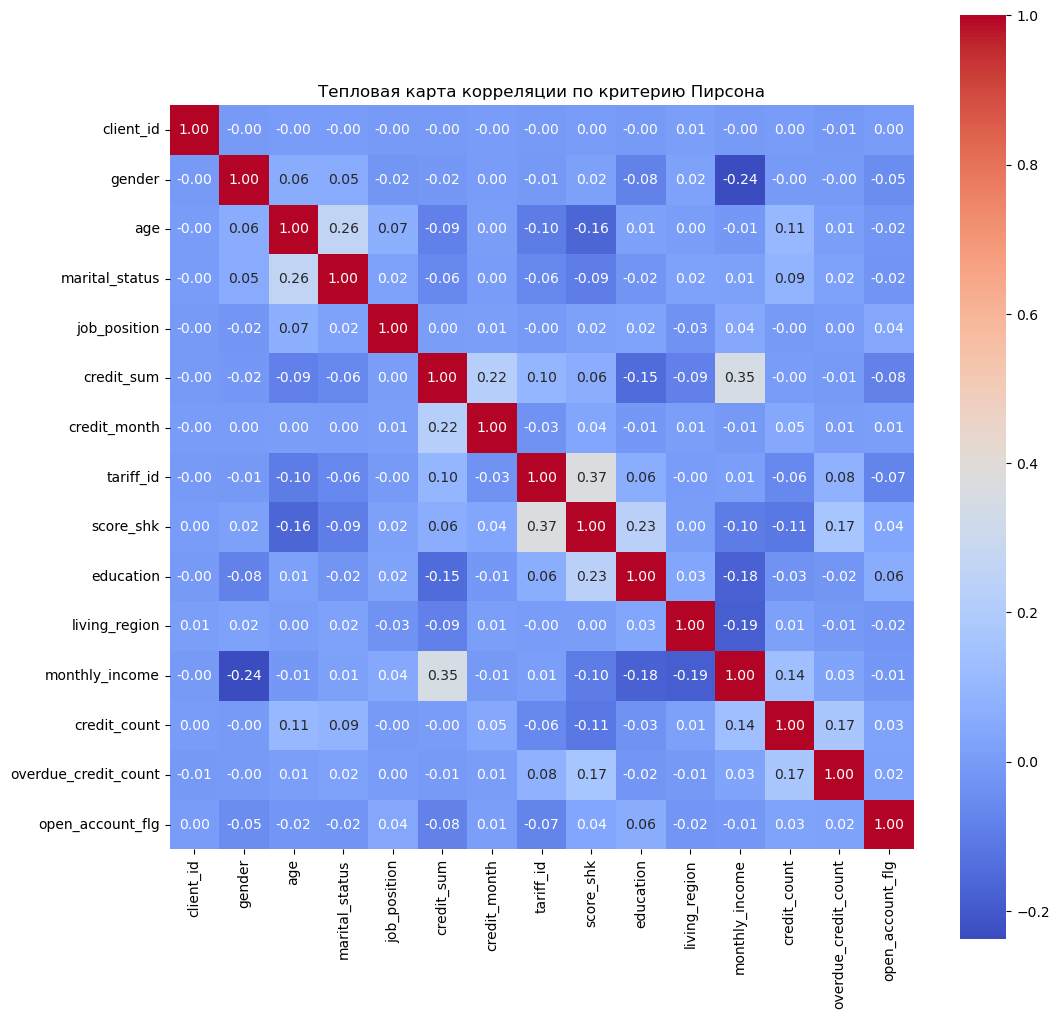

In [225]:
plt.figure(figsize = (12, 12));
sns.heatmap(pearson_correlation, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True);
plt.title('Тепловая карта корреляции по критерию Пирсона');
plt.show();

# Интерпретация результатов оценнки набора данных по критерию Пирсона

Значение коэффициента корреляции Пирсона интерпретируется исходя из его абсолютных значений. Возможные значения коэффициента корреляции Пирсона варьируются от 0 до ±1. Чем больше абсолютное значение коэффициента Пирсона – тем выше сила связи между двумя величинами. Коэффициент равный 0 говорит о полном отсутствии связи, коэффициент равный 1 – свидетельствует о наличии абсолютной (функциональной) связи. Если значение критерия корреляции Пирсона оказалось больше 1 или меньше -1 – в расчетах допущена ошибка.
Для оценки силы корреляционной связи обычно используются общепринятые критерии, согласно которым абсолютное значение коэффициента корреляции менее 0.3 свидетельствует о слабой связи, значение коэффициента корреляции в диапазоне от 0.3 до 0.7 - о связи средней силы, значение более 0.7 - о сильной связи.

# Проверка набора данных на нормальное распределение

Существует ряд методов для проверки нормального распределения данных. Приведем 3 наиболее известных их них: метод Колмогорова-Смирнова, метод Андерсона–Дарлинга, метод Шапиро-Уилка. Самым лучшим методом является метод Шапиро-Уилка, однако он плохо работает с выборками, в которых присутствует большое количество данных с одинаковыми значениями (наш случай). Метод Колмогорова-Смирнова значительно менее эффективный, чем методы Шапиро-Уилка и Андерсона–Дарлинга. Метод Андерсона–Дарлинга менее эффективен, чем метод Шапиро-Уилка, однако он лишен приведенных выше недостатков и является одним из лучших методов оценки статистических данных эмпирической функции распределения для выявления большинства отклонений от нормы. Применим метод Андерсона–Дарлинга. Для этого импортируем библиотеку для выполнения научных и инженерных расчётов "SciPy":

In [234]:
from scipy.stats import anderson, probplot;

Выведем гистограммы, графики плотности, "Q-Q" графики, блочные диаграммы с ограничителями выбросов для всех столбцов, которые являются статистически наиболее значимыми и тип данных в которых является числовым (столбцы "credit_sum", "monthly_income", "score_shk", "tariff_id" и "credit_count") и результаты расчета соответствия набора данных в этих столбцах нормальному распределению по методу Андерсона–Дарлинга:

Статистика теста для столбца 'credit_sum': 3390.2727654307964
Критические значения для столбца 'credit_sum': [0.576 0.656 0.787 0.918 1.092]
Уровни значимости для столбца 'credit_sum': [15.  10.   5.   2.5  1. ]
Распределение для столбца 'credit_sum' не является нормальным


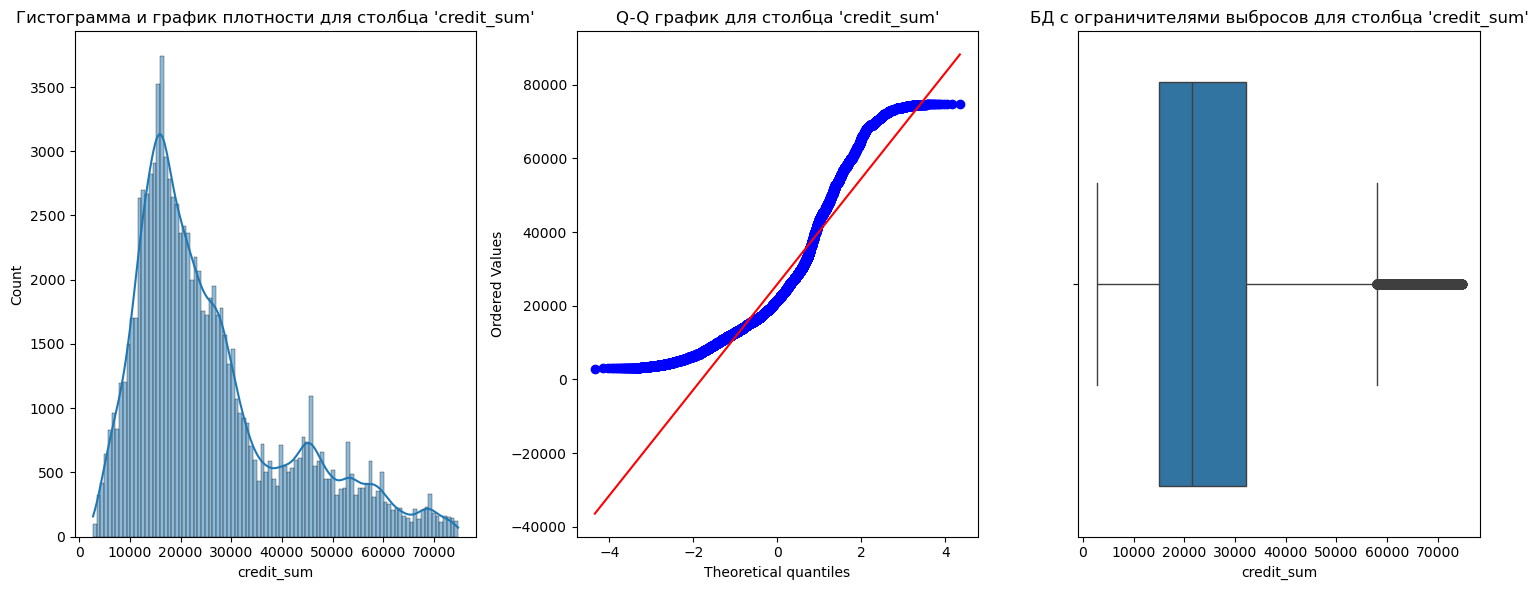

In [252]:
filtrated_table_z['credit_sum'] = pd.to_numeric(filtrated_table_z['credit_sum'], errors='coerce');

result_cs = anderson(filtrated_table_z['credit_sum'], dist = 'norm');
print("Статистика теста для столбца 'credit_sum':", result_cs.statistic);
print("Критические значения для столбца 'credit_sum':", result_cs.critical_values);
print("Уровни значимости для столбца 'credit_sum':", result_cs.significance_level);
if result_cs.statistic < result_cs.critical_values[2]:  # Использование критического значения для 5% уровня значимости
    print("Распределение для столбца 'credit_sum' является нормальным");
else:
    print("Распределение для столбца 'credit_sum' не является нормальным");

plt.figure(figsize = (15, 6));
plt.subplot(1, 3, 1);
sns.histplot(filtrated_table_z['credit_sum'], kde = True);
plt.title("Гистограмма и график плотности для столбца 'credit_sum'");

plt.subplot(1, 3, 2);
probplot(filtrated_table_z['credit_sum'], dist = "norm", plot = plt);
plt.title("Q-Q график для столбца 'credit_sum'");

plt.subplot(1, 3, 3);
sns.boxplot(x = filtrated_table_z['credit_sum']);
plt.title("БД с ограничителями выбросов для столбца 'credit_sum'");

plt.tight_layout();
plt.show();

Статистика теста для столбца 'monthly_income': 2160.3021766071906
Критические значения для столбца 'monthly_income': [0.576 0.656 0.787 0.918 1.092]
Уровни значимости для столбца 'monthly_income': [15.  10.   5.   2.5  1. ]
Распределение для столбца 'monthly_income' не является нормальным


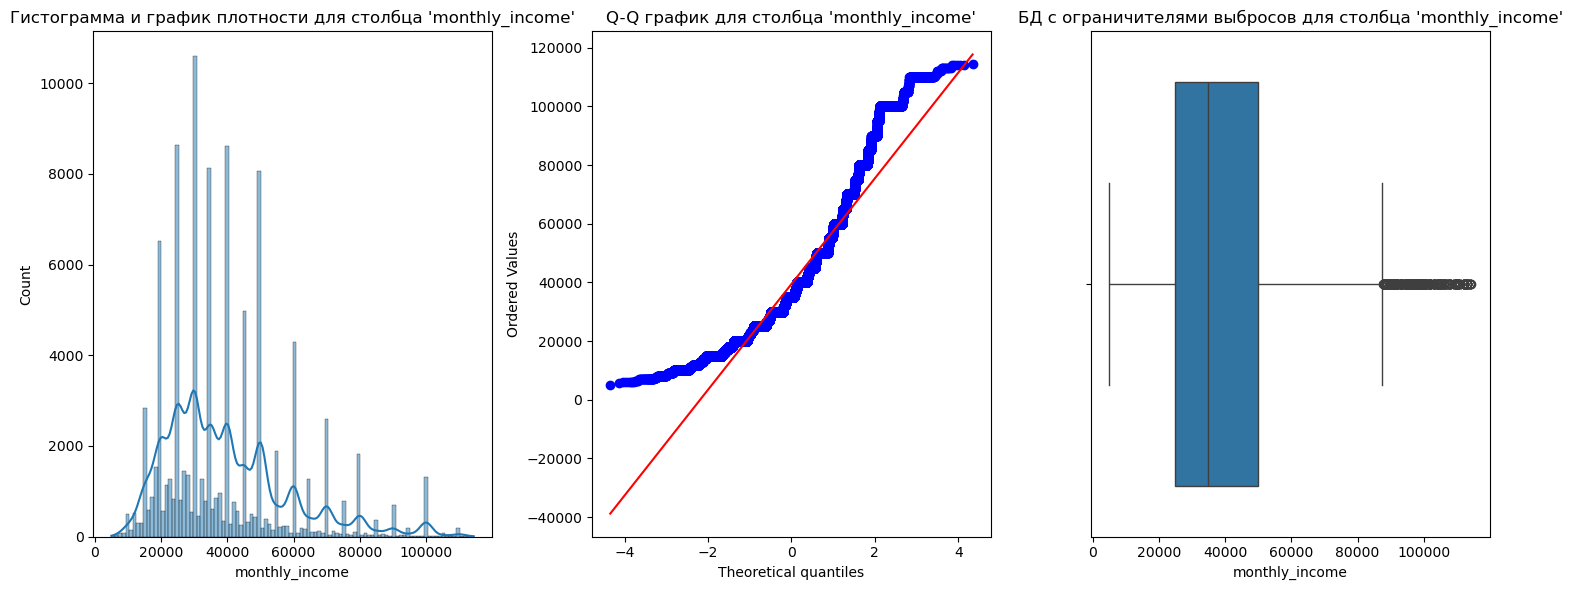

In [254]:
filtrated_table_z['monthly_income'] = pd.to_numeric(filtrated_table_z['monthly_income'], errors='coerce');

result_mi = anderson(filtrated_table_z['monthly_income'], dist = 'norm');
print("Статистика теста для столбца 'monthly_income':", result_mi.statistic);
print("Критические значения для столбца 'monthly_income':", result_mi.critical_values);
print("Уровни значимости для столбца 'monthly_income':", result_mi.significance_level);
if result_mi.statistic < result_mi.critical_values[2]:  
    print("Распределение для столбца 'monthly_income' является нормальным");
else:
    print("Распределение для столбца 'monthly_income' не является нормальным");

plt.figure(figsize = (15, 6));
plt.subplot(1, 3, 1);
sns.histplot(filtrated_table_z['monthly_income'], kde = True);
plt.title("Гистограмма и график плотности для столбца 'monthly_income'");


plt.subplot(1, 3, 2);
probplot(filtrated_table_z['monthly_income'], dist = "norm", plot = plt);
plt.title("Q-Q график для столбца 'monthly_income'");

plt.subplot(1, 3, 3);
sns.boxplot(x = filtrated_table_z['monthly_income']);
plt.title("БД с ограничителями выбросов для столбца 'monthly_income'");

plt.tight_layout();
plt.show();

Статистика теста для столбца 'score_shk': 167.80825348109647
Критические значения для столбца 'score_shk': [0.576 0.656 0.787 0.918 1.092]
Уровни значимости для столбца 'score_shk': [15.  10.   5.   2.5  1. ]
Распределение для столбца 'score_shk' не является нормальным


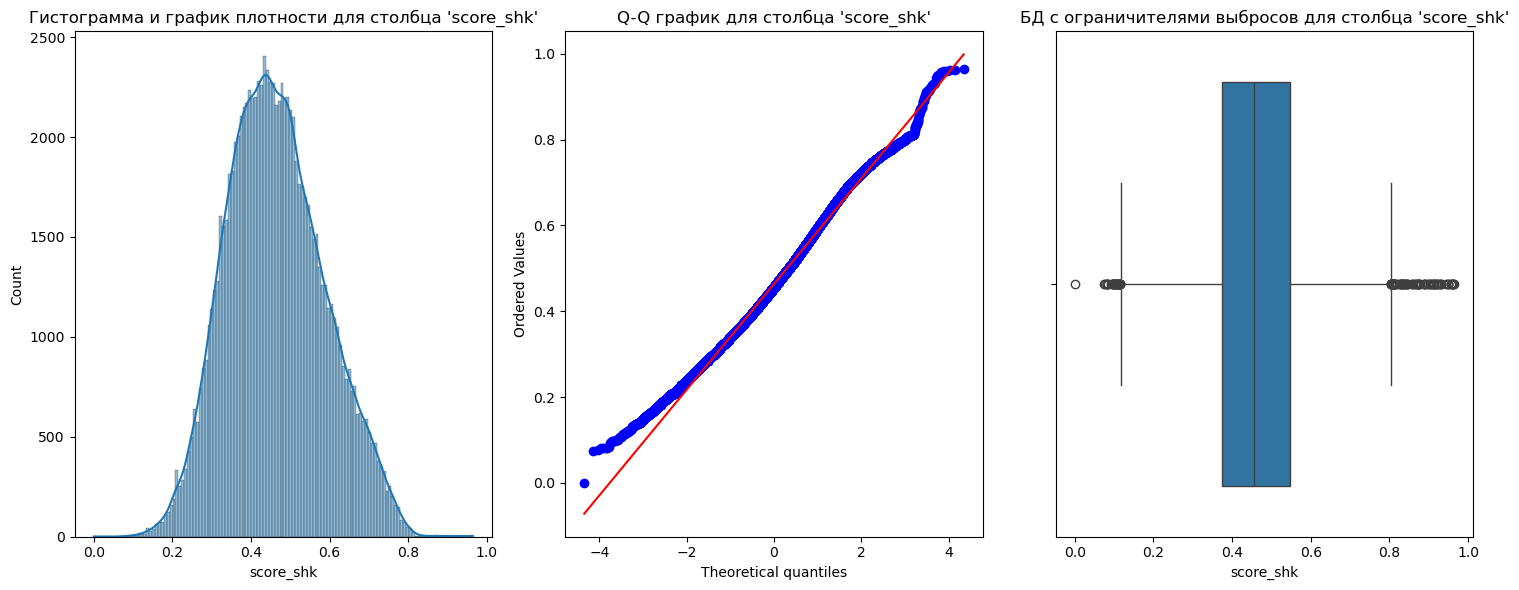

In [256]:
filtrated_table_z['score_shk'] = pd.to_numeric(filtrated_table_z['score_shk'], errors='coerce');

result_ss = anderson(filtrated_table_z['score_shk'], dist = 'norm');
print("Статистика теста для столбца 'score_shk':", result_ss.statistic);
print("Критические значения для столбца 'score_shk':", result_ss.critical_values);
print("Уровни значимости для столбца 'score_shk':", result_ss.significance_level);
if result_ss.statistic < result_ss.critical_values[2]:  
    print("Распределение для столбца 'score_shk' является нормальным");
else:
    print("Распределение для столбца 'score_shk' не является нормальным");

plt.figure(figsize = (15, 6));
plt.subplot(1, 3, 1);
sns.histplot(filtrated_table_z['score_shk'], kde = True);
plt.title("Гистограмма и график плотности для столбца 'score_shk'");


plt.subplot(1, 3, 2);
probplot(filtrated_table_z['score_shk'], dist = "norm", plot = plt);
plt.title("Q-Q график для столбца 'score_shk'");

plt.subplot(1, 3, 3);
sns.boxplot(x = filtrated_table_z['score_shk']);
plt.title("БД с ограничителями выбросов для столбца 'score_shk'");

plt.tight_layout();
plt.show();

Статистика теста для столбца 'tariff_id': 6012.608834279425
Критические значения для столбца 'tariff_id': [0.576 0.656 0.787 0.918 1.092]
Уровни значимости для столбца 'tariff_id': [15.  10.   5.   2.5  1. ]
Распределение для столбца 'tariff_id' не является нормальным


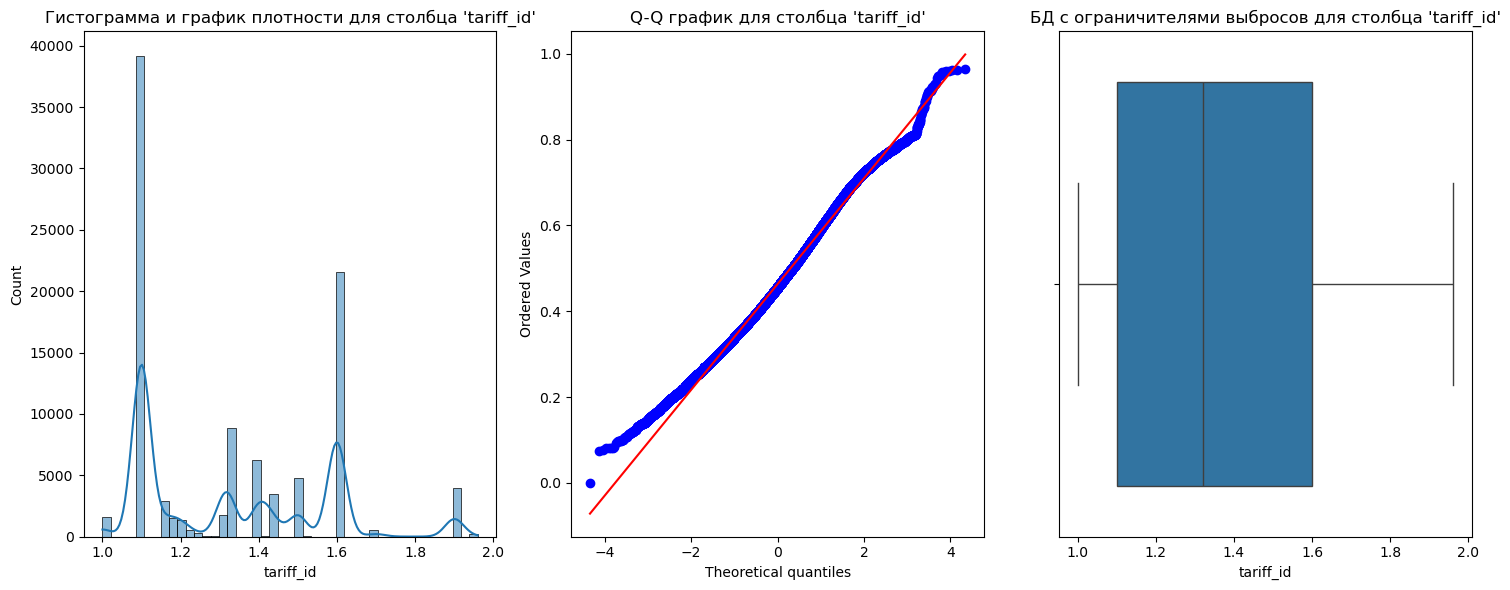

In [257]:
filtrated_table_z['tariff_id'] = pd.to_numeric(filtrated_table_z['tariff_id'], errors='coerce');

result_ti = anderson(filtrated_table_z['tariff_id'], dist = 'norm');
print("Статистика теста для столбца 'tariff_id':", result_ti.statistic);
print("Критические значения для столбца 'tariff_id':", result_ti.critical_values);
print("Уровни значимости для столбца 'tariff_id':", result_ti.significance_level);
if result_ti.statistic < result_ti.critical_values[2]:  
    print("Распределение для столбца 'tariff_id' является нормальным");
else:
    print("Распределение для столбца 'tariff_id' не является нормальным");

plt.figure(figsize = (15, 6));
plt.subplot(1, 3, 1);
sns.histplot(filtrated_table_z['tariff_id'], kde = True);
plt.title("Гистограмма и график плотности для столбца 'tariff_id'");


plt.subplot(1, 3, 2);
probplot(filtrated_table_z['score_shk'], dist = "norm", plot = plt);
plt.title("Q-Q график для столбца 'tariff_id'");

plt.subplot(1, 3, 3);
sns.boxplot(x = filtrated_table_z['tariff_id']);
plt.title("БД с ограничителями выбросов для столбца 'tariff_id'");

plt.tight_layout();
plt.show();

Статистика теста для столбца 'credit_count': 3148.1249126672774
Критические значения для столбца 'credit_count': [0.576 0.656 0.787 0.918 1.092]
Уровни значимости для столбца 'credit_count': [15.  10.   5.   2.5  1. ]
Распределение для столбца 'credit_count' не является нормальным


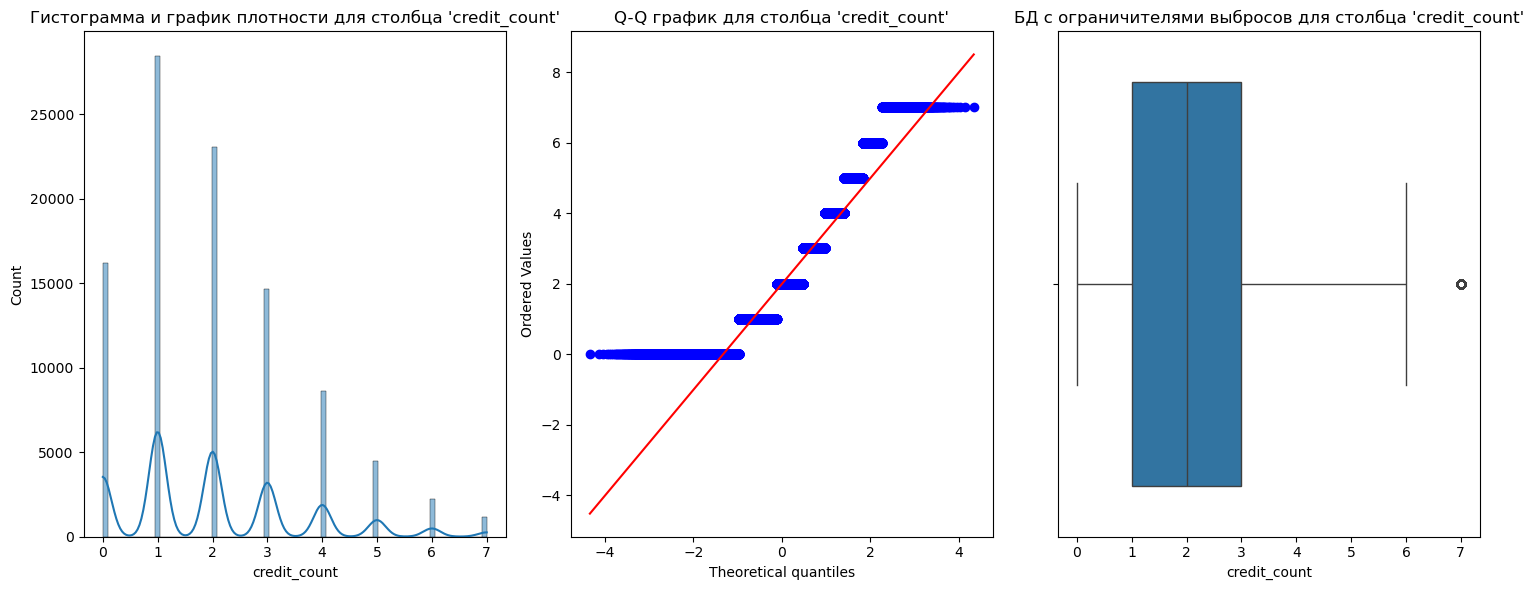

In [259]:
filtrated_table_z['credit_count'] = pd.to_numeric(filtrated_table_z['credit_count'], errors='coerce');

result_cc = anderson(filtrated_table_z['credit_count'], dist = 'norm');
print("Статистика теста для столбца 'credit_count':", result_cc.statistic);
print("Критические значения для столбца 'credit_count':", result_cc.critical_values);
print("Уровни значимости для столбца 'credit_count':", result_cc.significance_level);
if result_cc.statistic < result_cc.critical_values[2]:  
    print("Распределение для столбца 'credit_count' является нормальным");
else:
    print("Распределение для столбца 'credit_count' не является нормальным");

plt.figure(figsize = (15, 6));
plt.subplot(1, 3, 1);
sns.histplot(filtrated_table_z['credit_count'], kde = True);
plt.title("Гистограмма и график плотности для столбца 'credit_count'");


plt.subplot(1, 3, 2);
probplot(filtrated_table_z['credit_count'], dist = "norm", plot = plt);
plt.title("Q-Q график для столбца 'credit_count'");

plt.subplot(1, 3, 3);
sns.boxplot(x = filtrated_table_z['credit_count']);
plt.title("БД с ограничителями выбросов для столбца 'credit_count'");

plt.tight_layout();
plt.show();

По результатам анализа набора данных в статистически значимых столбцах по критерию Андерсона–Дарлинга можно утверждать, распределение значений в столбцах набора данных не соответствует нормальному.

# Масштабирование данных

Существует ряд методов для масштабирования данных. Мы будем использовать метод "min-max" нормализации для масштабирования данных в столбцах "credit_sum", "monthly_income", "score_shk", "tariff_id" и "credit_count". Уравнение "min-max" нормализации:

$$ x' = \frac{x_i - \text{min}(X)}{\text{max}(X) - \text{min}(X)}, $$

где xi - значение данных в i-ой строке, min(X) и max(X) - минимальные и максимальные значения выборки соответственно.

Для реализации данного метода нормализации, подключим библиотеку для машинного обучения "Scikit-learn":

In [276]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler;

Далее произведем нормализацию данных и выведем результат в виде гистограммы частоты распределения нормализованных данных по столбцам:

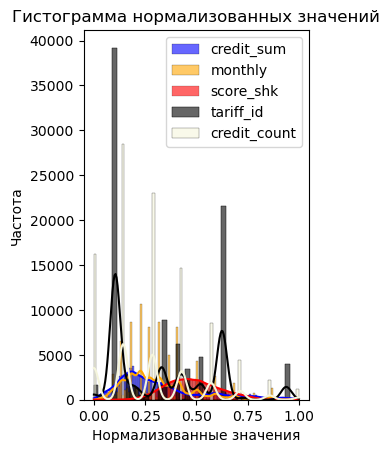

In [279]:
min_max_scaler = MinMaxScaler();
filtrated_table_z['credit_sum_min_max'] = min_max_scaler.fit_transform(filtrated_table_z[['credit_sum']]);
filtrated_table_z['monthly_income_min_max'] = min_max_scaler.fit_transform(filtrated_table_z[['monthly_income']]);
filtrated_table_z['score_shk_min_max'] = min_max_scaler.fit_transform(filtrated_table_z[['score_shk']]);
filtrated_table_z['tariff_id_min_max'] = min_max_scaler.fit_transform(filtrated_table_z[['tariff_id']]);
filtrated_table_z['credit_count_min_max'] = min_max_scaler.fit_transform(filtrated_table_z[['credit_count']]);


plt.subplot(1, 2, 1)
sns.histplot(filtrated_table_z['credit_sum_min_max'], kde = True, color = 'blue', label = 'credit_sum', alpha = 0.6);
sns.histplot(filtrated_table_z['monthly_income_min_max'], kde = True, color = 'orange', label = 'monthly', alpha = 0.6);
sns.histplot(filtrated_table_z['score_shk_min_max'], kde = True, color = 'red', label = 'score_shk', alpha = 0.6);
sns.histplot(filtrated_table_z['tariff_id_min_max'], kde = True, color = 'black', label = 'tariff_id', alpha = 0.6);
sns.histplot(filtrated_table_z['credit_count_min_max'], kde = True, color = 'beige', label = 'credit_count', alpha = 0.6);

plt.title('Гистограмма нормализованных значений');
plt.xlabel('Нормализованные значения');
plt.ylabel('Частота');
plt.legend();
plt.show();

# Выводы

В ходе данной работы были выполнены следуцющие задачи:
1) Проведен анализ данных и выполнена подготовка набора данных;
2) Проведена оценка выбросов в наборе данных методом проверки на логические ошибки и методом z-оценки;
3) Проведен анализ корреляции данных по критерию Пирсона;
4) Проведена проверка набора данных на нормальное распределение по методу Андерсона–Дарлинга;
5) Проведено масштабирование данных по методу "min-max" нормализации.

Цели и задачи работы были выполнены.